# RNN : Unit, Memory Cell
- 시계열 데이터 분석
- 시계열 데이터 : 데이터가 순서가 있고 데이터가 순차적으로 연결이 되어있는 것이다.
- RNN의 Unit은 다른 것과 다르게 weight가 두개가 있다.(출력값이 입력값으로 다시 돌아갈 때 weight가 있다.)
- 앞선 Unit의 계산의 결과가 다음 Unit의 계산에 영향을 미친다.


### RNN: application
1. sequence-sequence
2. sequence-vector
3. vector-sequence
4. Encoder - Decoder


### RNN: Attention layer
1. Encoder,Decoder 사이에 하나의 아웃풋 덩어리를 생성해서 Encode, Decoder사이에 끼운다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

2023-06-19 20:03:07.438837: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-19 20:03:07.524869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 20:03:08.904755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
def gen_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time-offset1)*(freq1*10+10))
    series += 0.2 * np.sin((time-offset2)*(freq2*20+20))
    series += 0.1 * (np.random.rand(batch_size, n_steps)-0.5)
    return np.expand_dims(series, -1).astype(np.float32)

n_steps = 50
series = gen_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_test, y_test = series[7000:, :n_steps], series[7000:, -1]


In [5]:
print(X_train.shape, y_train.shape)
# (7000, 50, 1) == (sample, step, 현재 step의 기록값)
# 한 step에서의 기록값은 여러개가 될 수도 있다.
# 즉, 데이터는 50개의 time step로 연결이 되어있다.

(7000, 50, 1) (7000, 1)


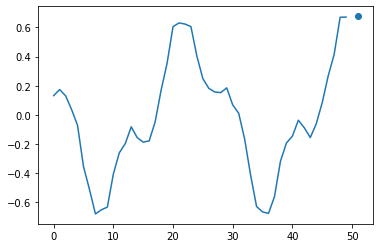

In [7]:
_, axe = plt.subplots()
axe.plot(X_train[0])
axe.scatter([51], y_train[0])

In [8]:
m1 = keras.Sequential([
    keras.layers.SimpleRNN(1, input_shape=(None,1))
])
m1.compile(optimizer ='adam',
          loss = 'mse',  # MeanSquareError
           metrics='mae') # MeanApsoluteError
m1.fit(X_train, y_train, epochs = 10, verbose = 1)
m1.evaluate(X_test, y_test)

2023-06-19 20:13:38.189904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-19 20:13:38.231919: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
219/219 [==============================] - 4s 11ms/step - loss: 0.0795 - mae: 0.2424
Epoch 2/10
219/219 [==============================] - 2s 10ms/step - loss: 0.0564 - mae: 0.2035
Epoch 3/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0392 - mae: 0.1686
Epoch 4/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0265 - mae: 0.1373
Epoch 5/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0183 - mae: 0.1130
Epoch 6/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0141 - mae: 0.0982
Epoch 7/10
219/219 [==============================] - 2s 11ms/step - loss: 0.0124 - mae: 0.0916
Epoch 8/10
219/219 [==============================] - 2s 10ms/step - loss: 0.0119 - mae: 0.0892
Epoch 9/10
219/219 [==============================] - 2s 10ms/step - loss: 0.0117 - mae: 0.0882
Epoch 10/10
94/94 [==============================] - 1s 4ms/step - loss: 0.0115 - mae: 0.0872


[0.011470557190477848, 0.08723091334104538]

In [10]:
pred = m1.predict(X_test)
print(pred[0])

94/94 [==============================] - 1s 4ms/step
[-0.19900304]


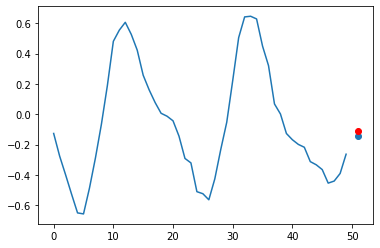

In [15]:
sample_no = 3
_, axe = plt.subplots()
axe.plot(X_test[0])
axe.scatter([51], y_test[sample_no])
axe.scatter([51], pred[sample_no], c = 'r')

In [21]:
#####################Blood.csv

data = pd.read_csv('blood.csv', encoding='utf8', delimiter=':', header=3)
data.head()

data = data.drop(['합계', '소계', '계'], axis = 1)

In [22]:
data.columns = [x for x in np.arange(120)]
data.drop(0, axis =0, inplace=True)

for c in data:
    data[c] = data[c].apply(lambda x: x.replace(',', '')).astype('float32')

print(data) # row == sample, columns == step

        0        1        2        3        4        5        6        7    \
1   19717.0  21007.0  18606.0  18473.0  22297.0  18261.0  20134.0  17774.0   
2   21367.0  24102.0  22376.0  18947.0  24395.0  21973.0  26835.0  23757.0   
3   15640.0  17367.0  21009.0  16331.0  23085.0  16225.0  17677.0  17563.0   
4   17341.0  19317.0  18592.0  19200.0  21419.0  17198.0  17688.0  18673.0   
5   13853.0  14766.0  14144.0  13607.0  15485.0  14161.0  15242.0  13965.0   
6    5982.0   6675.0   6143.0   6573.0   7500.0   6393.0   6683.0   6989.0   
7   14183.0  15904.0  14596.0  14077.0  16534.0  14411.0  16273.0  13246.0   
8    8846.0   8753.0   9579.0   9174.0   9028.0   8619.0   8963.0   8261.0   
9    6896.0   6994.0   8125.0   8701.0   9759.0   7864.0   8754.0   7713.0   
10  15512.0  15727.0  16590.0  17215.0  19709.0  16240.0  17170.0  16209.0   
11   9342.0   9939.0  10378.0  10674.0  13057.0  11323.0  10505.0  10139.0   
12  14868.0  15988.0  14667.0  15417.0  18606.0  16813.0  16263.

In [31]:
data.shape
# smaple, step, 현재 step의 기록된 값
X = np.expand_dims(data.iloc[:, :-1], -1)
y = np.expand_dims(data.iloc[:, -1], -1)
print(X.shape, y.shape)

# train : 12, test: 2
X_train = X[:12]
X_test = X[12:]
y_train = y[:12]
y_test = y[12:]
print(X_train.shape, y_train.shape)

(14, 119, 1) (14, 1)
(12, 119, 1) (12, 1)


In [34]:
m = keras.Sequential([
    keras.layers.SimpleRNN(10, input_shape = (None,1), return_sequences=True),
    keras.layers.SimpleRNN(5)
])
m.compile(loss= 'mse', optimizer = 'adam', metrics = 'mae')
m.fit(X_train, y_train, epochs = 10)
m.evaluate(X_test, y_test)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 258900272.0000 - mae: 15299.1680
Epoch 2/10
1/1 [==============================] - 0s 58ms/step - loss: 258900096.0000 - mae: 15299.1611
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 258899888.0000 - mae: 15299.1562
Epoch 4/10
1/1 [==============================] - 0s 55ms/step - loss: 258899712.0000 - mae: 15299.1514
Epoch 5/10
1/1 [==============================] - 0s 57ms/step - loss: 258899504.0000 - mae: 15299.1445
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 258899280.0000 - mae: 15299.1367
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 258899088.0000 - mae: 15299.1299
Epoch 8/10
1/1 [==============================] - 0s 66ms/step - loss: 258898896.0000 - mae: 15299.1240
Epoch 9/10
1/1 [==============================] - 0s 80ms/step - loss: 258898704.0000 - mae: 15299.1201
Epoch 10/10
1/1 [==============================] - 1s 533ms/step -

[76175352.0, 7712.8544921875]